In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Data collection
[Wine quality Kaggle dataset](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

In [2]:
wine_data = pd.read_csv("/content/winequality-red.csv")

print(wine_data.shape)
wine_data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Data understanding (Data analysis and visualization)

Missing values

In [3]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Describe

In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##Data visualization

Target distribution

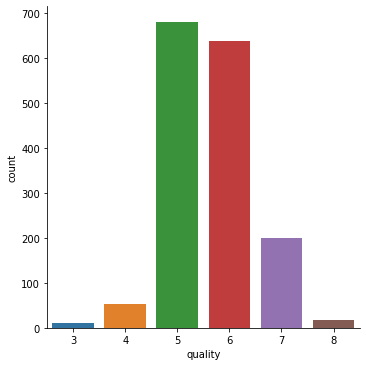

In [5]:
sns.catplot(x='quality', data = wine_data, kind = 'count')

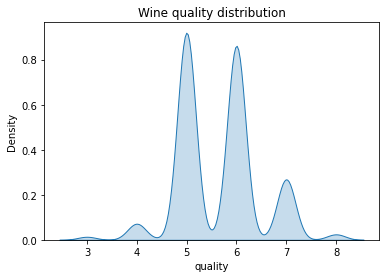

In [6]:
plt.title("Wine quality distribution")
sns.kdeplot(data=wine_data['quality'], shade=True)

Features visualization

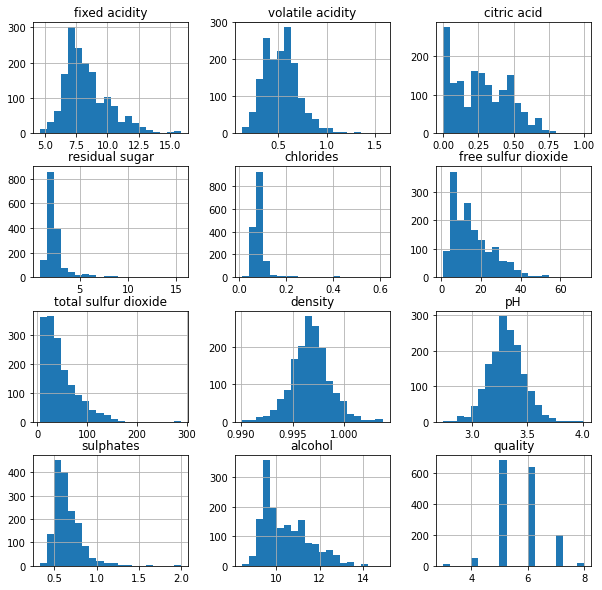

In [7]:
#plot histogram
wine_data.hist(bins=20,figsize=(10,10))

plt.show()

Correlation

In [8]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


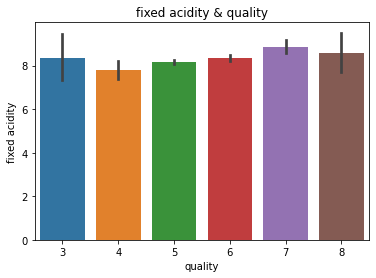

In [9]:
plt.title('fixed acidity & quality')
sns.barplot(x='quality', y = 'fixed acidity', data = wine_data)

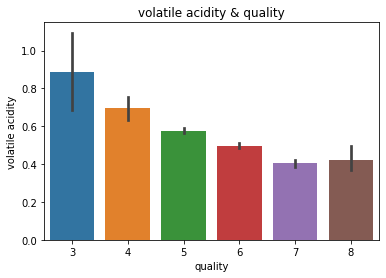

In [10]:
plt.title('volatile acidity & quality')
sns.barplot(x='quality', y = 'volatile acidity', data = wine_data)

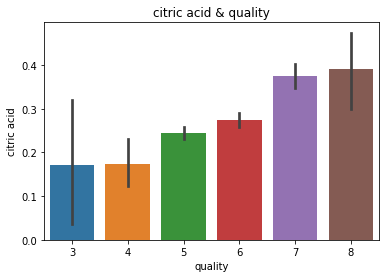

In [11]:
plt.title('citric acid & quality')
sns.barplot(x='quality', y = 'citric acid', data = wine_data)

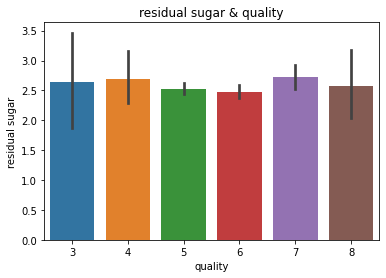

In [12]:
plt.title('residual sugar & quality')
sns.barplot(x='quality', y = 'residual sugar', data = wine_data)

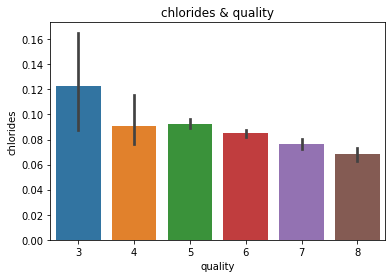

In [13]:
plt.title('chlorides & quality')
sns.barplot(x='quality', y = 'chlorides', data = wine_data)

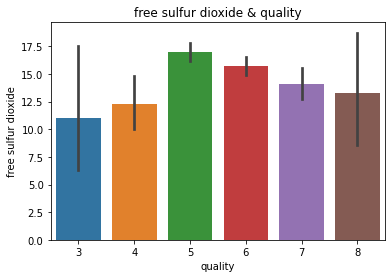

In [14]:
plt.title('free sulfur dioxide & quality')
sns.barplot(x='quality', y = 'free sulfur dioxide', data = wine_data)

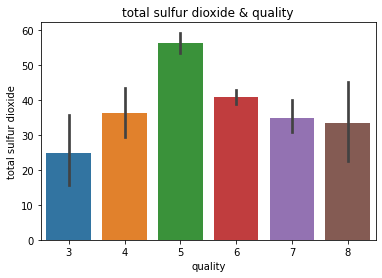

In [15]:
plt.title('total sulfur dioxide & quality')
sns.barplot(x='quality', y = 'total sulfur dioxide', data = wine_data)

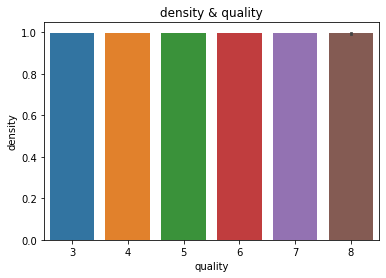

In [16]:
plt.title('density & quality')
sns.barplot(x='quality', y = 'density', data = wine_data)

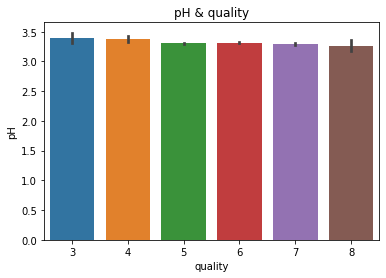

In [17]:
plt.title('pH & quality')
sns.barplot(x='quality', y = 'pH', data = wine_data)

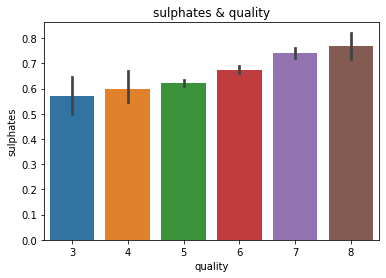

In [18]:
plt.title('sulphates & quality')
sns.barplot(x='quality', y = 'sulphates', data = wine_data)

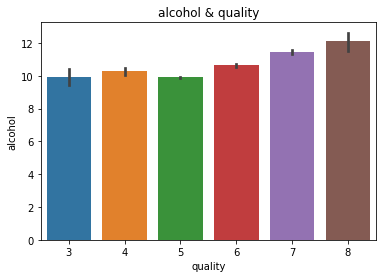

In [19]:
plt.title('alcohol & quality')
sns.barplot(x='quality', y = 'alcohol', data = wine_data)

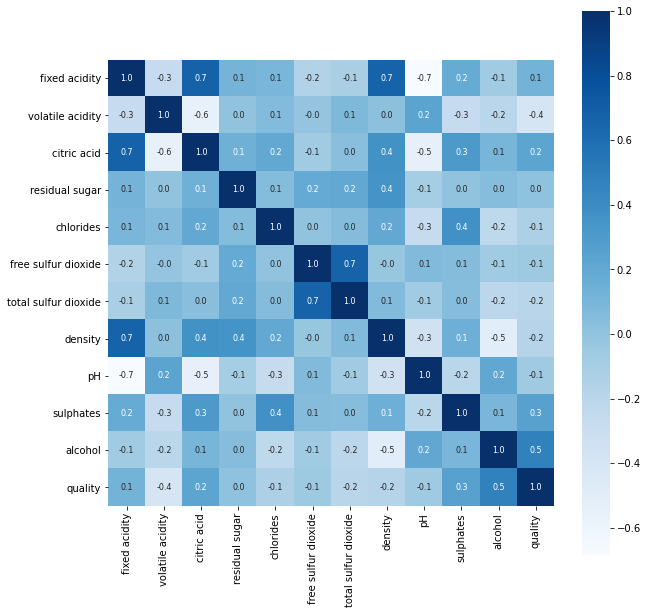

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_data.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

#Data preparation

##X

In [21]:
X = wine_data.drop('quality', axis=1)

print('X shape:', X.shape)

X shape: (1599, 11)


##Y.
Create labels for classification: Poor[0;4], Normal[5;6], Good[7:8]

In [22]:
def get_label(y):
  if y < 5:
    return 0
  elif y < 7:
    return 1
  else:
    return 2

Y = wine_data[['quality']]
Y['quality'] = Y['quality'].map(get_label)

print('Y shape:', Y.shape)
Y.head()

Y shape: (1599, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,quality
0,1
1,1
2,1
3,1
4,1


In [23]:
Y['quality'].value_counts()

1    1319
2     217
0      63
Name: quality, dtype: int64

###Feature selection

Check for Constant features

In [24]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]

print(len(constant_columns))

0


###Feature scaling

In [25]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print('X shape:', X.shape)
X.head()

X shape: (1599, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


#Model training and evaluation

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
df = pd.DataFrame(columns = ['classifier','train_accuracy','test_accuracy', 'precision', 'recall', 'f1 score'])

def _run_eval_model(model):
  model.fit(X_train, Y_train.quality.ravel())
  
  X_train_prediction = model.predict(X_train)
  train_accuracy = accuracy_score(X_train_prediction, Y_train)
  
  X_test_prediction = model.predict(X_test)
  test_accuracy = accuracy_score(X_test_prediction, Y_test)
  
  p_r_f1 = precision_recall_fscore_support(Y_test, X_test_prediction, average='micro')
  print('\n-----------------------------------------------------')
  print(model)
  print(classification_report(X_test_prediction, Y_test))

  return train_accuracy, test_accuracy, p_r_f1[0], p_r_f1[1], p_r_f1[2]

model_insts = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC()]
model_names = ['Logistic Regression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'SVC']

for i in range(len(model_insts)):
  result = _run_eval_model(model_insts[i])
  df.loc[i] = [model_names[i]] + list(result)


df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



-----------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.98      0.88      0.93       299
           2       0.41      0.71      0.52        21

    accuracy                           0.87       320
   macro avg       0.46      0.53      0.48       320
weighted avg       0.94      0.87      0.90       320


-----------------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



-----------------------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.98      0.89      0.93       296
           2       0.49      0.75      0.59        24

    accuracy                           0.88       320
   macro avg       0.49      0.55      0.51       320
weighted avg       0.94      0.88      0.91       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,classifier,train_accuracy,test_accuracy,precision,recall,f1 score
0,Logistic Regression,0.838937,0.868750,0.868750,0.868750,0.868750
1,RandomForestClassifier,1.000000,0.896875,0.896875,0.896875,0.896875
2,KNeighborsClassifier,0.873339,0.862500,0.862500,0.862500,0.862500
3,DecisionTreeClassifier,1.000000,0.837500,0.837500,0.837500,0.837500
4,SVC,0.854574,0.878125,0.878125,0.878125,0.878125


Cross-validation with RandomForestClassifier - the best model

In [27]:
#Random Forest Classifier
model_rf = RandomForestClassifier()
scores = cross_val_score(model_rf, X, Y, cv=5)

print('\nScores:', scores)
print('Mean:', np.mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 


Scores: [0.834375   0.8125     0.84375    0.840625   0.84326019]
Mean: 0.8349020376175549


## Visualization results

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 

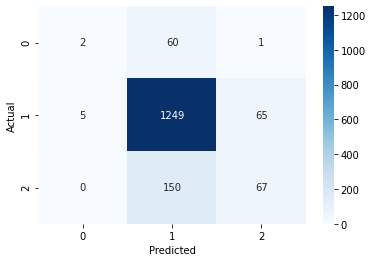

In [28]:
cv_predictions = cross_val_predict(model_rf, X, Y, cv=5)
confusion_matrix = pd.crosstab(Y.quality.ravel(), cv_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')